## Data Exploration

In [53]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from matplotlib.image import imread
import pandas as pd
from PIL import Image
import cv2

In [ ]:
# Download data set from Kaggle and unzip into directory
!pip install kaggle
!mkdir -p ~/.kaggle
!kaggle datasets download -d abdohamdg/fracatlas-dataset
!unzip -q fracatlas-dataset.zip -d fracatlas_directory/

Dataset URL: https://www.kaggle.com/datasets/abdohamdg/fracatlas-dataset
License(s): ODC Public Domain Dedication and Licence (PDDL)
fracatlas-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace fracatlas_directory/Fracatlas/data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
# Base directory and subsets to access for images
base_directory = 'fracatlas_directory/Fracatlas/'
subsets = ['train', 'test', 'validation']

In [3]:
# Check if image and label names match

def name_match(image_dir, label_dir):
    image_files = os.listdir(image_dir) # List of image files
    label_files = os.listdir(label_dir) # List of label files

    # Check if each image has a corresponding label file
    missing_labels = []
    for image_file in image_files:
        label_file = os.path.splitext(image_file)[0] + '.txt'
        if label_file not in label_files:
            missing_labels.append(image_file)

    if missing_labels:
        print(f"Missing labels for images: {missing_labels}")
    else:
        print("All images have corresponding label files.")

# Iterate through each subset and count number of files
for subset in subsets:
    image_directory = os.path.join(base_directory, subset, 'images')

    if subset == 'validation':
        label_directory = os.path.join(base_directory, subset, 'lables')  # Possible typo in folder name
    else:
        label_directory = os.path.join(base_directory, subset, 'labels')

    # Check labels for the current subset
    print(f"Checking for mismatched labels in {subset} subset:")
    name_match(image_directory, label_directory)
    print()

Checking for mismatched labels in train subset:
All images have corresponding label files.

Checking for mismatched labels in test subset:
All images have corresponding label files.

Checking for mismatched labels in validation subset:
All images have corresponding label files.



In [4]:
# Check number of images and labels (observations) in each subset

total_obs = 0
# Iterate through each subset and count number of files
for subset in subsets:
    image_directory = os.path.join(base_directory, subset, 'images')

    if subset == 'validation':
        label_directory = os.path.join(base_directory, subset, 'lables')  # Possible typo in folder name
    else:
        label_directory = os.path.join(base_directory, subset, 'labels')

    # Count image files
    image_files = os.listdir(image_directory)
    num_images = len(image_files)

    # Count label files
    label_files = os.listdir(label_directory)
    num_labels = len(label_files)

    total_obs+=num_images
    
    # Print the counts
    print(f"{subset.capitalize()} subset:")
    print(f"  Number of images: {num_images}")
    print(f"  Number of labels: {num_labels}\n")
    
print(f"Total number of images: {total_obs}\n")

Train subset:
  Number of images: 574
  Number of labels: 574

Test subset:
  Number of images: 61
  Number of labels: 61

Validation subset:
  Number of images: 82
  Number of labels: 82

Total number of images: 717



In [14]:
# Further exploring class distribution

# Initialize a set to store unique class IDs
class_ids = set()

# List to store image sizes
image_sizes = []

# Total images counter
total_images = 0

# Iterate through each subset
for subset in subsets:
    image_directory = os.path.join(base_directory, subset, 'images')

    if subset == 'validation':
        label_directory = os.path.join(base_directory, subset, 'lables')  # Possible typo in folder name
    else:
        label_directory = os.path.join(base_directory, subset, 'labels')

    image_files = os.listdir(image_directory)
    label_files = os.listdir(label_directory)

    total_images += len(image_files)

    # Process label files
    for label_file in label_files:
        label_file_path = os.path.join(label_directory, label_file)

        with open(label_file_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                elements = line.strip().split()
                if elements:
                    class_id = elements[0]
                    class_ids.add(class_id)

    # Process image files
    for image_file in image_files:
        image_file_path = os.path.join(image_directory, image_file)
        img = imread(image_file_path)
        if img is not None:
            height, width = img.shape[:2]
            image_sizes.append((width, height))
        else:
            print(f"Failed to read image: {image_file_path}")

print(f"Total number of images: {total_images}")
print(f"Number of classes: {len(class_ids)}")
print(f"Class IDs: {sorted(class_ids)}")

Total number of images: 717
Number of classes: 1
Class IDs: ['0']


In [5]:
# Check if all label files have same format

# Function to check number of entries in label file and return total count
def check_label_file(label_file_path):
    with open(label_file_path, 'r') as f:
        content = f.readlines()  # Read all lines
        all_numbers = []

        for line in content:
            numbers = line.strip().split()  # Split by spaces
            all_numbers.extend(numbers)  # Collect all numbers

        return len(all_numbers)

# Dictionary to store number of occurrences of each number of entries
count_dict = {}
total_empty_files = 0

# Check label files in each subset
for subset in subsets:
    if subset == 'validation':
        label_directory = os.path.join(base_directory, subset, 'lables')  # Possible typo in folder name
    else:
        label_directory = os.path.join(base_directory, subset, 'labels')

    label_files = os.listdir(label_directory)

    for label_file in label_files:
        label_file_path = os.path.join(label_directory, label_file)
        num_count = check_label_file(label_file_path)

        # Check conditions
        if num_count == 0:
            total_empty_files += 1
        else:
            # Update count in the dictionary
            if num_count in count_dict:
                count_dict[num_count] += 1
            else:
                count_dict[num_count] = 1

# Output the total empty files first
print(f"Total empty files: {total_empty_files}")

# Output the counts in ascending order for non-empty files
for number in sorted(count_dict.keys()):
    print(f"Total files with {number} numbers: {count_dict[number]}")
    
print(f"Total number of observations: {sum(count_dict.values())}")

Total empty files: 0
Total files with 5 numbers: 546
Total files with 10 numbers: 146
Total files with 15 numbers: 17
Total files with 20 numbers: 7
Total files with 25 numbers: 1
Total number of observations: 717


All label files have the correct YOLO format

In [13]:
# Check if each line in the label file starts with 0 or 1 (valid classes)

def check_label(label_file_path):
    with open(label_file_path, 'r') as f:
        line = f.readlines()
        for l in line:
            numbers = l.strip().split()
            
            if not (len(numbers) == 5 and numbers[0] in {"0", "1"}):
                return False
        return True

tot_invalid_class_files = 0

for sub in subsets:
    label_dir = os.path.join(base_directory, sub, 'lables' if sub == 'validation' else 'labels')
    
    if not os.path.exists(label_dir):
        print(f"Directory not found: {label_dir}")
        continue

    label_files = os.listdir(label_dir)

    for label_file in label_files:
        label_file_path = os.path.join(label_dir, label_file)
        is_valid = check_label(label_file_path)

        if not is_valid:
            tot_invalid_class_files += 1

print(f"Number of files with invalid class values: {total_invalid_class_files}")

Number of files with invalid class values: 0


All files follow the correct format, and so there are no missing values

In [40]:
unique_image_sizes = set(image_sizes)
print(f"Number of unique image sizes: {len(unique_image_sizes)}")

# Display unique image sizes
print("Unique image sizes:")
for size in unique_image_sizes:
    print(size)

# Find the most common image size
size_counter = Counter(image_sizes)
most_common_size = size_counter.most_common(1)[0]
print(f"\nMost common image size: {most_common_size[0]} with {most_common_size[1]} occurrences")

Number of unique image sizes: 3
Unique image sizes:
(512, 512)
(256, 256)
(1024, 1024)

Most common image size: (512, 512) with 3 occurrences


In [35]:
# Plot distribution of image sizes

def get_image_sizes(image_directory):
    sizes = []
    for image_file in os.listdir(image_directory):
        if image_file.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(image_directory, image_file)
            with Image.open(img_path) as img:
                width, height = img.size
                sizes.append((width, height))
    return sizes

class_sizes = {}

for subset in subsets:
    subset_directory = os.path.join(base_directory, subset)
    
    if not os.path.exists(subset_directory):
        print(f"Directory not found: {subset_directory}")
        continue
    
    image_directory = os.path.join(subset_directory, 'images')
    label_directory = os.path.join(subset_directory, 'labels')
    
    if os.path.exists(image_directory):
        sizes = get_image_sizes(image_directory)
        class_sizes[subset] = sizes
        
size_data = []
for subset_name, sizes in class_sizes.items():
    for width, height in sizes:
        size_data.append({'Subset': subset_name, 'Width': width, 'Height': height})

size_df = pd.DataFrame(size_data)
print(size_df)

    Subset  Width  Height
0    train   2304    2880
1    train   2304    2880
2    train    373     454
3    train    373     454
4    train   2304    2880
..     ...    ...     ...
712   test    373     454
713   test    373     454
714   test    454     373
715   test    373     454
716   test    373     454

[717 rows x 3 columns]


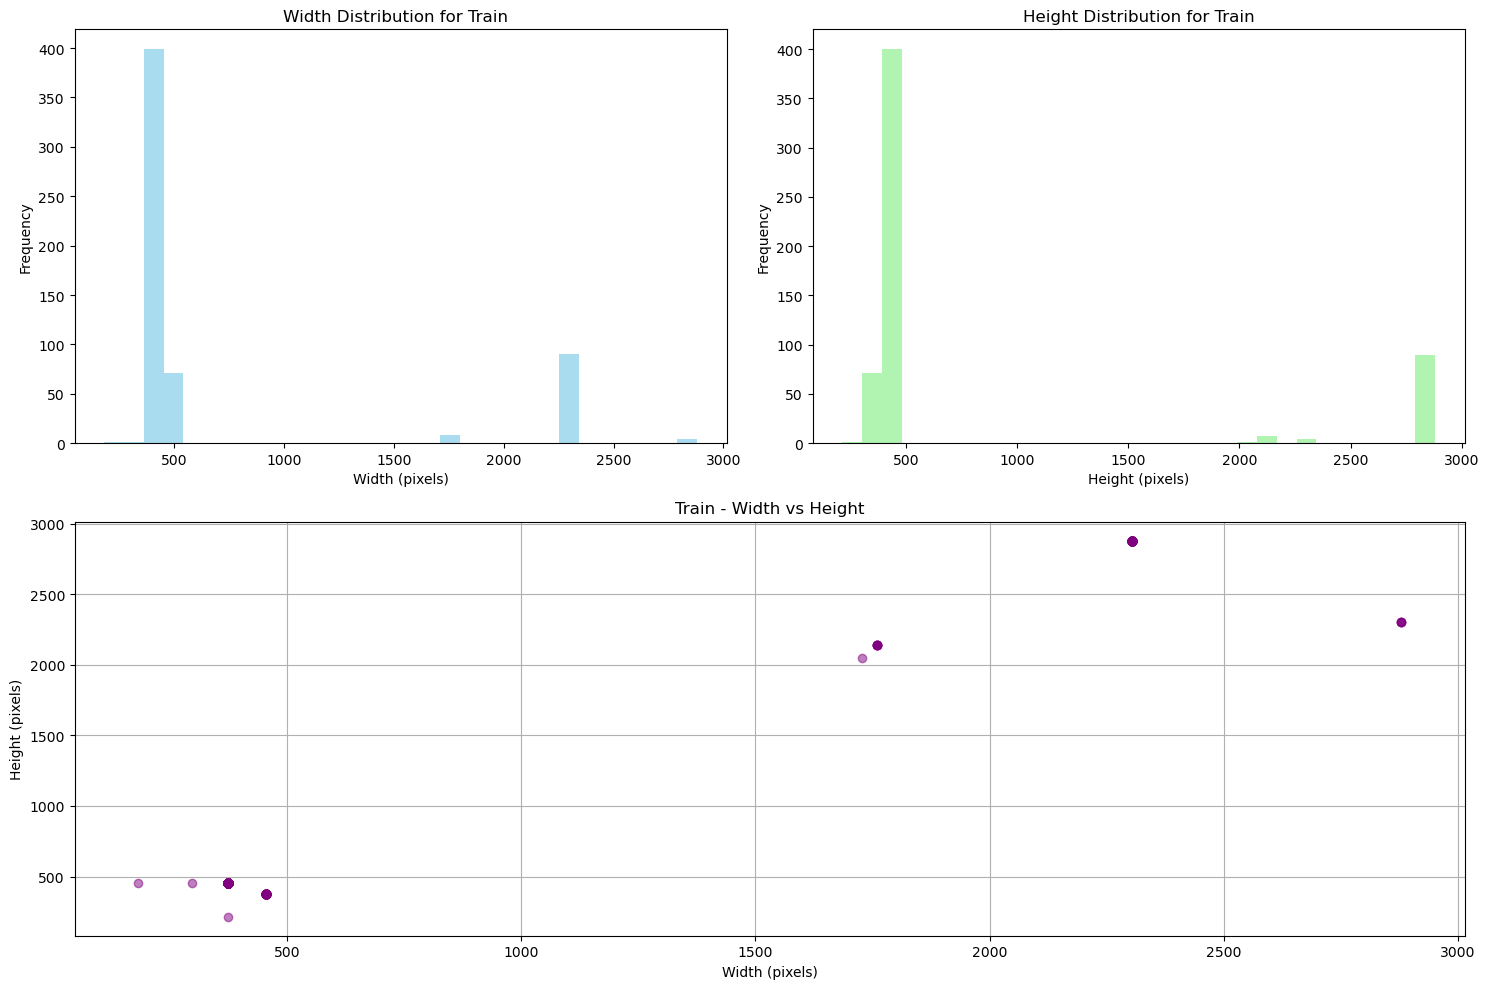

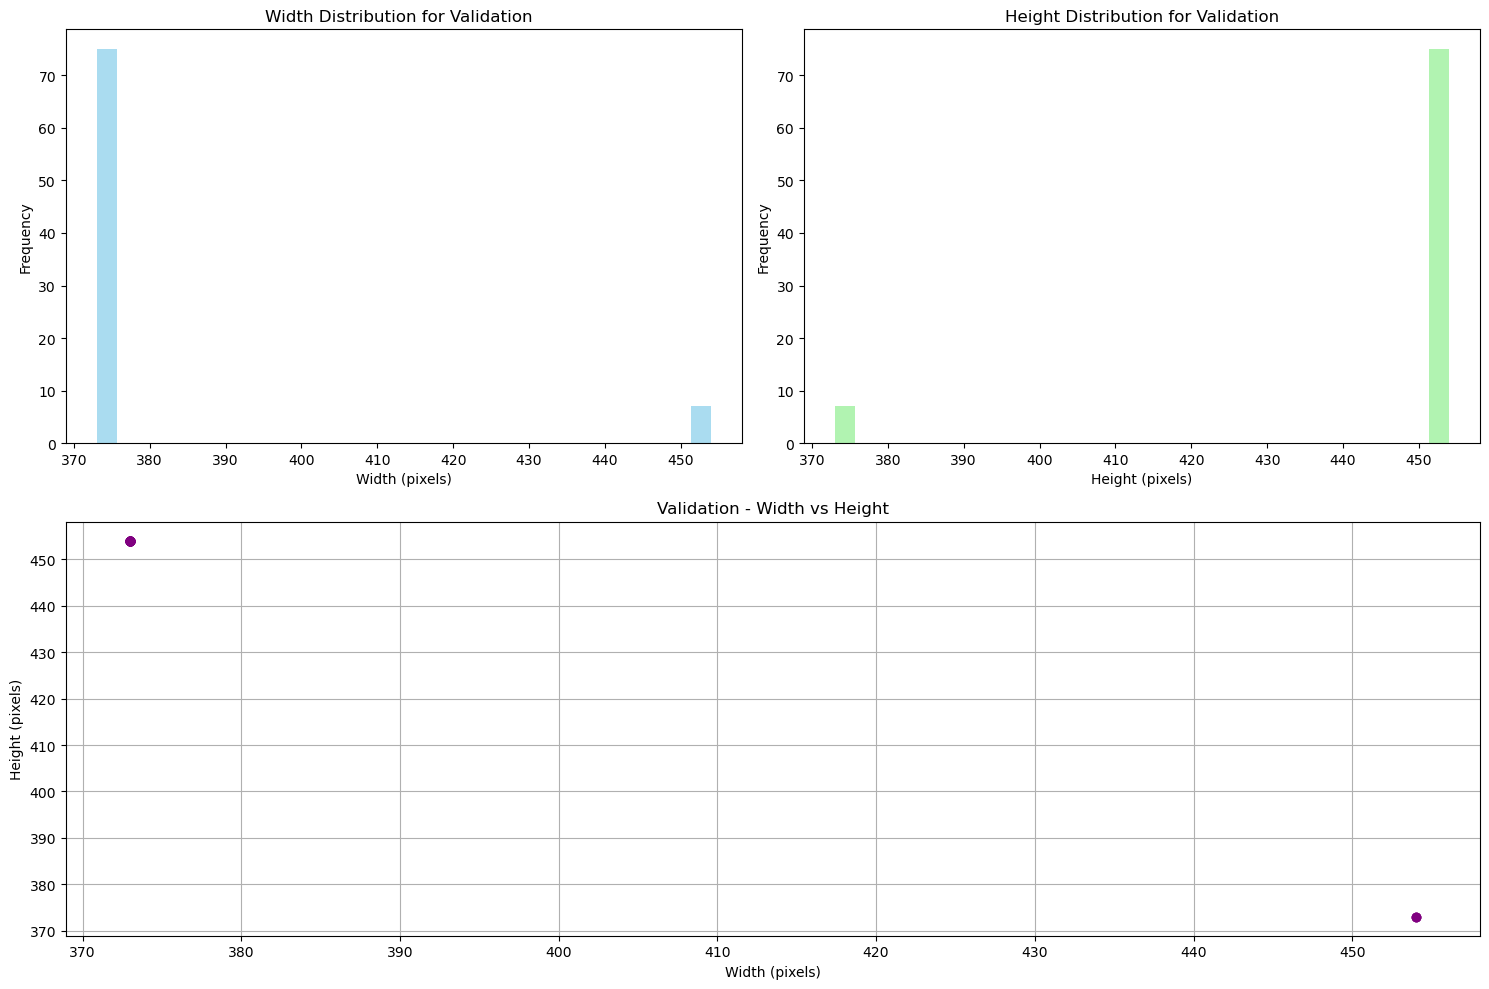

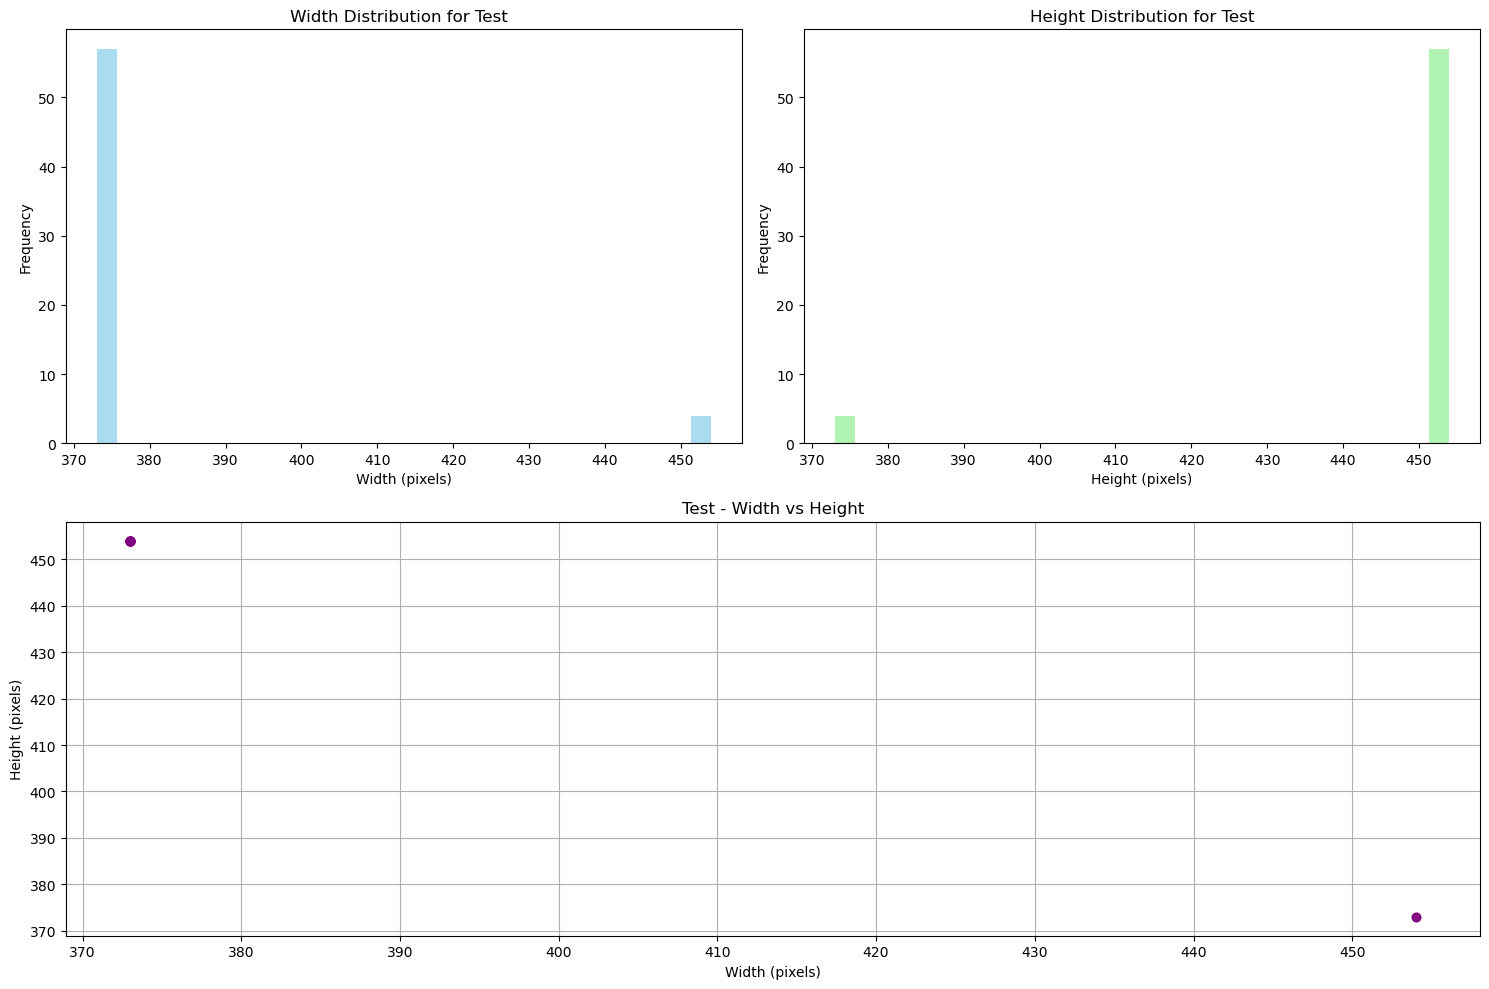

In [52]:
import matplotlib.pyplot as plt

for sub in subsets:
    subset_data = size_df[size_df['Subset'] == sub]

    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    plt.hist(subset_data['Width'], bins=30, color='skyblue', alpha=0.7)
    plt.title(f'Width Distribution for {sub.capitalize()}  ')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 2)
    plt.hist(subset_data['Height'], bins=30, color='lightgreen', alpha=0.7)
    plt.title(f'Height Distribution for {sub.capitalize()}')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')

    plt.subplot(2, 1, 2)
    plt.scatter(subset_data['Width'], subset_data['Height'], alpha=0.5, color='purple')
    plt.title(f'{sub.capitalize()} - Width vs Height')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')
    plt.grid()

    plt.tight_layout()
    plt.show()


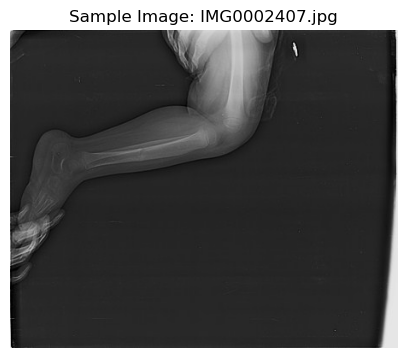

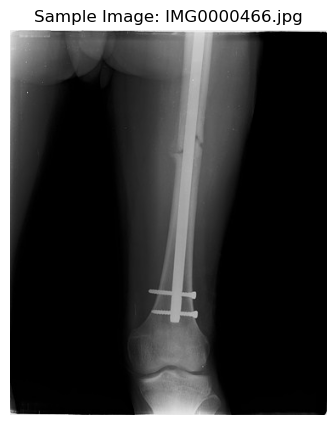

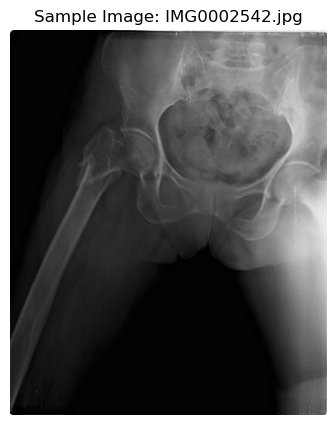

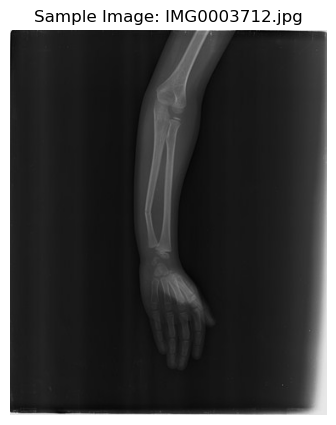

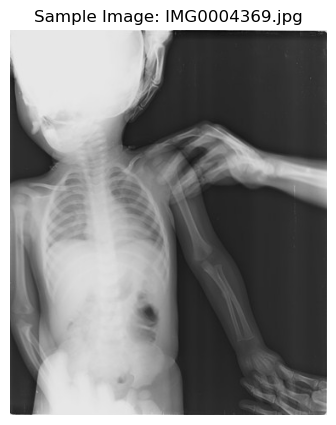

In [43]:
import random

# Collect all image paths
all_image_paths = []
for subset in subsets:
    image_directory = os.path.join(base_directory, subset, 'images')
    image_files = os.listdir(image_directory)
    for image_file in image_files:
        image_file_path = os.path.join(image_directory, image_file)
        all_image_paths.append(image_file_path)

# Select 5 random images to display
sample_images = random.sample(all_image_paths, 5)

# Plot the images
for image_path in sample_images:
    img = imread(image_path)
    if img is not None:
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.title(f"Sample Image: {os.path.basename(image_path)}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to read image: {image_path}")

Class 0 has 764 images.
Class 1 has 0 images.


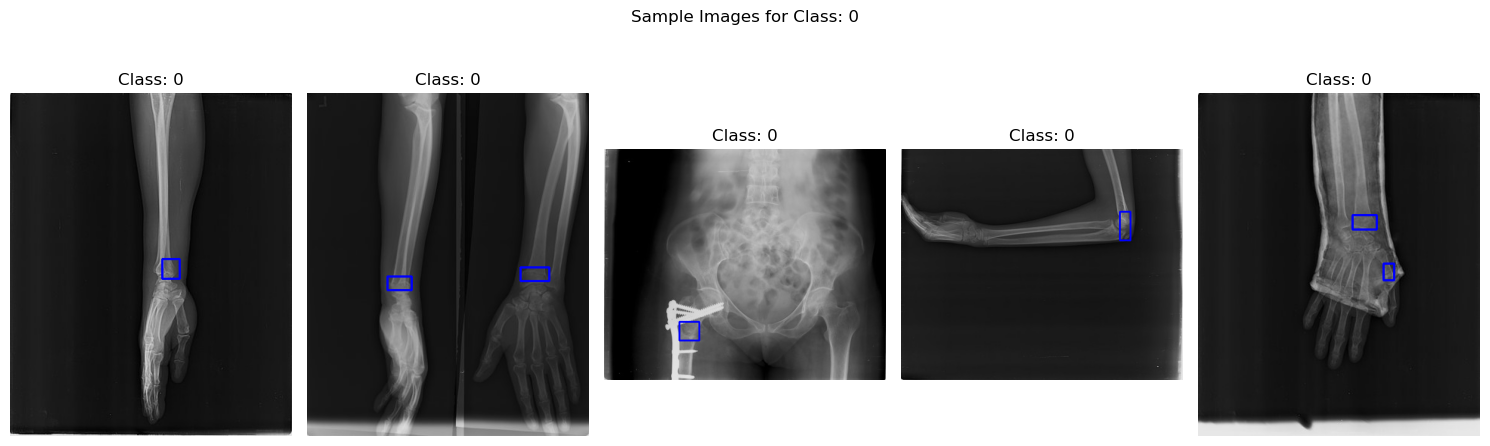

No images found for Class 1.


In [47]:
# Plot examples classes of images with bounding boxes

def load_class_labels_and_bboxes(images_dir, labels_dir):
    class_dict = {0: [], 1: []} 
    bboxes_dict = {}

    for label_file in os.listdir(labels_dir):
        if label_file.endswith('.txt'):
            img_name = label_file.replace('.txt', '.jpg')
            img_path = os.path.join(images_dir, img_name)

            img = cv2.imread(img_path)
            height, width = img.shape[:2]
            bboxes = []

            with open(os.path.join(labels_dir, label_file), 'r') as file:
                lines = file.readlines()
                for line in lines:
                    values = line.split()
                    class_id = int(values[0]) 
                    x_center = float(values[1])
                    y_center = float(values[2])
                    box_width = float(values[3])
                    box_height = float(values[4])

                    bboxes.append({
                        'class_id': class_id,
                        'x_min': int((x_center - box_width / 2) * width),
                        'y_min': int((y_center - box_height / 2) * height),
                        'x_max': int((x_center + box_width / 2) * width),
                        'y_max': int((y_center + box_height / 2) * height)
                    })

                    if class_id in class_dict:
                        class_dict[class_id].append(img_name)
                        
            bboxes_dict[img_name] = bboxes

    return class_dict, bboxes_dict


def plot_images_with_bboxes(images_dir, labels_dir, num_samples=5):
    class_dict, bboxes_dict = load_class_labels_and_bboxes(images_dir, labels_dir)

    for class_id, images in class_dict.items():
        print(f"Class {class_id} has {len(images)} images.")

    for class_id in class_dict.keys():
        if len(class_dict[class_id]) == 0:
            print(f"No images found for Class {class_id}.")
            continue

        fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
        sampled_images = random.sample(class_dict[class_id], min(num_samples, len(class_dict[class_id])))

        for i, img_name in enumerate(sampled_images):
            img_path = os.path.join(images_dir, img_name)
            img = cv2.imread(img_path)

            if img_name in bboxes_dict:
                for bbox in bboxes_dict[img_name]:
                    cv2.rectangle(img, (bbox['x_min'], bbox['y_min']),
                                  (bbox['x_max'], bbox['y_max']),
                                  color=(255, 0, 0), thickness=2) 

            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i].imshow(img_rgb)
            axes[i].set_title(f'Class: {class_id}')
            axes[i].axis("off")

        plt.suptitle(f'Sample Images for Class: {class_id}')
        plt.tight_layout()
        plt.show()

train_images_dir = 'fracatlas_directory/Fracatlas/train/images'
train_labels_dir = 'fracatlas_directory/Fracatlas/train/labels'

plot_images_with_bboxes(train_images_dir, train_labels_dir)

In [75]:
base_path = 'fracatlas_directory/Fracatlas'
subdirs = ['train', 'test', 'validation']

def load_and_preprocess_images():
    processed_images = []
    
    for subdir in subdirs:
        image_path = os.path.join(base_path, subdir, 'images')
        
        for filename in os.listdir(image_path):
            # Constructed the full file path
            file_path = os.path.join(image_path, filename)
            
            # Loaded the image
            image = cv2.imread(file_path)
            if image is None:
                print(f"Could not load image {filename} in {subdir}")
                continue
            
            # Converted to grayscale
            grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            # Normalized pixel brightness (0-1 range)
            normalized_image = grayscale_image / 255.0
            
            # Standardized (zero mean, unit variance)
            mean, std = np.mean(normalized_image), np.std(normalized_image)
            standardized_image = (normalized_image - mean) / std
            
            # Appended the processed image to the list
            processed_images.append((subdir, filename, standardized_image))
            
            # Displays a sample processed image
#             plt.imshow(standardized_image, cmap='gray')
#             plt.title(f'Processed Image: {filename} ({subdir})')
#             plt.show()

    print("All images processed.")
    return processed_images

processed_images = load_and_preprocess_images()

All images processed.


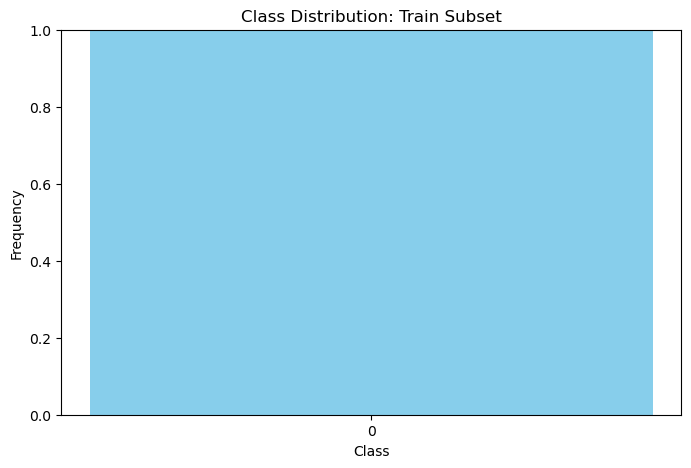

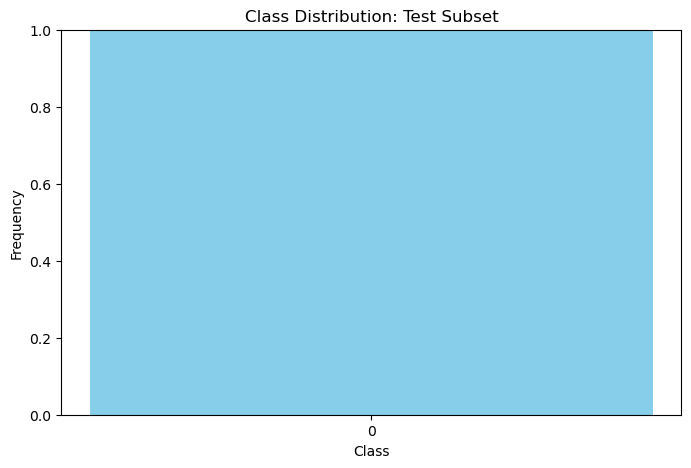

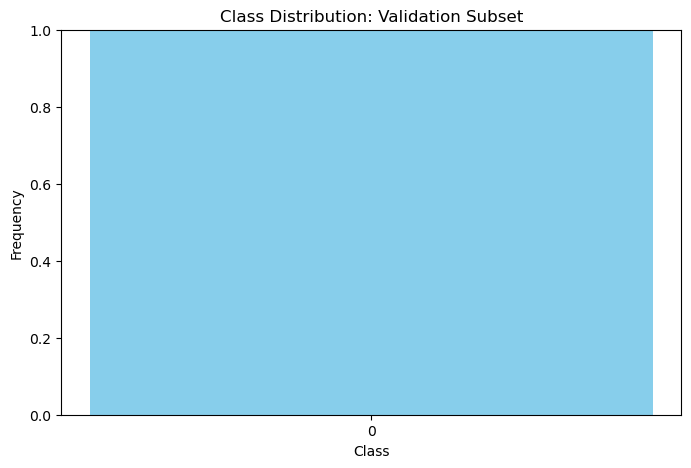

In [73]:
def count_class(base_dir, subsets):
    class_counts = {subset: Counter() for subset in subsets}
    
    for subset in subsets:
        labels_dir = os.path.join(base_dir, subset, 'labels') if subset != 'validation' else os.path.join(base_directory, subset, 'lables')

        if not os.path.isdir(labels_dir):
            print(f"Directory not found: {labels_dir}. Skipping this subset.")
            continue
        
        for label_file in os.listdir(labels_dir):
            if label_file.endswith('.txt'):
                with open(os.path.join(labels_dir, label_file), 'r') as file:
                    for line in file:
                        class_id = int(line.split()[0])
                        class_counts[subset][class_id] += 1
    
    return class_counts

class_counts = count_class(base_directory, subsets)

for subset, counts in class_counts.items():
    if counts:
        plt.figure(figsize=(8, 5))
        classes = list(counts.keys())
        frequencies = list(counts.values())
        
        plt.bar(classes, frequencies, color='skyblue')
        plt.title(f"Class Distribution: {subset.capitalize()} Subset")
        plt.ylabel("Frequency")
        plt.xlabel("Class")
        plt.xticks(classes)
        plt.ylim(0, 1)
        plt.show()
    else:
        print(f"No data available for {subset} subset.")
